In [869]:
import numpy as np
import pandas as pd
from scipy.stats import rankdata
import uuid
import json
import os
import urllib
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt

In [870]:
pd.options.display.max_columns = None

# Combining the Data

In [1006]:
def get_percentiles(d):
    return (rankdata(d, 'min')-1)/len(d)

In [1007]:
# Junction Percentiles for 2012 - 2017

In [1008]:
# 350000 exemption limit in 2012
incomes2012_13 = list(individual_balance_sheet_2012_13["income"].sort_values())
p2012_13 = get_percentiles(incomes2012_13)
i_2012_13 = 0
while incomes2012_13[i_2012_13] < 350000:
    i_2012_13 += 1
survey_top_incomes_2012_13 = incomes2012_13[i_2012_13:]
print(p2012_13[i_2012_13])

0.900109657512


In [1009]:
# 400000 exemption limit in 2013
incomes2013_14 = list(individual_balance_sheet_2013_14["income"].sort_values())
p2013_14 = get_percentiles(incomes2013_14)
i_2013_14 = 0
while incomes2013_14[i_2013_14] < 400000:
    i_2013_14 += 1
survey_top_incomes_2013_14 = incomes2013_14[i_2013_14:]
print(p2013_14[i_2013_14])

0.938917499403


In [1010]:
# 400000 exemption limit in 2014
incomes2014_15 = list(individual_balance_sheet_2014_15["income"].sort_values())
p2014_15 = get_percentiles(incomes2014_15)
i_2014_15 = 0
while incomes2014_15[i_2014_15] < 400000:
    i_2014_15 += 1
survey_top_incomes_2014_15 = incomes2014_15[i_2014_15:]
print(p2014_15[i_2014_15])

0.920433052892


In [1011]:
# 400000 exemption limit in 2015
incomes2015_16 = list(individual_balance_sheet_2015_16["income"].sort_values())
p2015_16 = get_percentiles(incomes2015_16)
i_2015_16 = 0
while incomes2015_16[i_2015_16] < 400000:
    i_2015_16 += 1
survey_top_incomes_2015_16 = incomes2015_16[i_2015_16:]
print(p2015_16[i_2015_16])

0.882081344677


In [1012]:
# GROWTH RATES

In [1013]:
# growth rate for 
(sum(survey_top_incomes_2013_14) - sum(survey_top_incomes_2012_13)) / sum(survey_top_incomes_2012_13)

-0.83584835773671862

In [1014]:
# growth rate for 2012 - 2013
(sum(survey_top_incomes_2014_15) - sum(survey_top_incomes_2013_14)) / sum(survey_top_incomes_2013_14)

4.3510604864454896

In [1015]:
# growth rate for 2012 - 2013
(sum(survey_top_incomes_2015_16) - sum(survey_top_incomes_2014_15)) / sum(survey_top_incomes_2014_15)

-0.54534958912638898

In [1016]:
# POSSIBLY adjust tax data for survey growth

In [1017]:
# Generate New Tables, equally weighting the tax observations

In [1018]:
def get_sorted_table(table_type, start_year):  
    """
    Sorted by income.
    
    Args:
        str (table_type): accepts only 'hh' for household or 'individual' for individual.
        int (start_year): currently limited to 2004 - 2015.

    Returns:
        pd.DataFrame: dataframe corresponding to table.
    """
    t = eval(table_type + "_balance_sheet_" + str(start_year) + "_" + str(start_year+1)[-2:])
    return t.sort_values(by=['income']).reset_index().drop(["index"], axis=1)

In [1073]:
weight_to_distribute = sum(list(get_sorted_table("individual", 2012)["weights"])[i_2012_13:]) / len(taxable_incomes_salaried_2012_13)
incomes_to_add = np.array(taxable_incomes_salaried_2012_13) / 1
num_rows = get_sorted_table("individual", 2012).shape[0]
filtered_table = get_sorted_table("individual", 2012).drop(np.arange(i_2012_13, num_rows, 1), axis=0)

new_entries_df = pd.DataFrame([[x, weight_to_distribute] for x in incomes_to_add], columns=["income", "weights"])
final_individual_incomes_2012_13 = filtered_table.append(new_entries_df).reset_index().drop(["index"], axis=1)
final_individual_incomes_2012_13["income"] = final_individual_incomes_2012_13["income"].astype(int)

In [1120]:
new_entries_df

,income,weights
0,4.000500e+05,4.479063
1,4.000500e+05,4.479063
2,4.000500e+05,4.479063
3,4.000500e+05,4.479063
4,4.000500e+05,4.479063
5,4.000500e+05,4.479063
6,4.000500e+05,4.479063
7,4.000500e+05,4.479063
8,4.000500e+05,4.479063
9,4.000500e+05,4.479063


In [1074]:
weight_to_distribute = sum(list(get_sorted_table("individual", 2013)["weights"])[i_2013_14:]) / len(taxable_incomes_salaried_2013_14)
incomes_to_add = np.array(taxable_incomes_salaried_2013_14) / 1
num_rows = get_sorted_table("individual", 2013).shape[0]
filtered_table = get_sorted_table("individual", 2013).drop(np.arange(i_2013_14, num_rows, 1), axis=0)

new_entries_df = pd.DataFrame([[x, weight_to_distribute] for x in incomes_to_add], columns=["income", "weights"])
final_individual_incomes_2013_14 = filtered_table.append(new_entries_df).reset_index().drop(["index"], axis=1)
final_individual_incomes_2013_14["income"] = final_individual_incomes_2013_14["income"].astype(int)

In [1075]:
weight_to_distribute = sum(list(get_sorted_table("individual", 2014)["weights"])[i_2014_15:]) / len(taxable_incomes_salaried_2014_15)
incomes_to_add = np.array(taxable_incomes_salaried_2014_15) / 1
num_rows = get_sorted_table("individual", 2014).shape[0]
filtered_table = get_sorted_table("individual", 2014).drop(np.arange(i_2014_15, num_rows, 1), axis=0)

new_entries_df = pd.DataFrame([[x, weight_to_distribute] for x in incomes_to_add], columns=["income", "weights"])
final_individual_incomes_2014_15 = filtered_table.append(new_entries_df).reset_index().drop(["index"], axis=1)
final_individual_incomes_2014_15["income"] = final_individual_incomes_2014_15["income"].astype(int)

In [1076]:
weight_to_distribute = sum(list(get_sorted_table("individual", 2015)["weights"])[i_2015_16:]) / len(taxable_incomes_salaried_2015_16)
incomes_to_add = np.array(taxable_incomes_salaried_2015_16) / 1
num_rows = get_sorted_table("individual", 2015).shape[0]
filtered_table = get_sorted_table("individual", 2015).drop(np.arange(i_2015_16, num_rows, 1), axis=0)

new_entries_df = pd.DataFrame([[x, weight_to_distribute] for x in incomes_to_add], columns=["income", "weights"])
final_individual_incomes_2015_16 = filtered_table.append(new_entries_df).reset_index().drop(["index"], axis=1)
final_individual_incomes_2015_16["income"] = final_individual_incomes_2015_16["income"].astype(int)

In [1077]:
# NEED TO BACKCALCULATE THE GROWTH OF THIS SAME PERCENTILE ON EARLIER SURVEY DATA. FOR NOW JUST SHOWING SURVEY DATA

In [1078]:
final_individual_incomes_2004_05 = get_sorted_table("individual", 2004)
final_individual_incomes_2005_06 = get_sorted_table("individual", 2005)
final_individual_incomes_2006_07 = get_sorted_table("individual", 2006)
final_individual_incomes_2007_08 = get_sorted_table("individual", 2007)
final_individual_incomes_2008_09 = get_sorted_table("individual", 2008)
final_individual_incomes_2010_11 = get_sorted_table("individual", 2010)
final_individual_incomes_2011_12 = get_sorted_table("individual", 2011)

# HAVE NOT CLEANED BELOW, NONSENSICAL AT MOMENT / TRIED CALCULATIONS

Here we combine everything and test our assumptions on how we combine these two data sources. Let's first compare the tax data to the survey data. 

It only makes sense to look at survey data above the tax exemption level, where we have data on taxes. Remember that:

1) We observe taxable income only, meaning we have to assume that the taxable income is some percentage of actual income. We divide by this percentage to get annual income. We can vary this percentage for different parts of the tax bracket.

2) We have two taxable income datasets, for salaried and non-salaried earners. We have to assume the actual data is a mix of both types, we will make assumptions for what this mix is. Note that assuming that an amount of tax paid is from a non-salaried earner means we impute lower income levels for the person compared to if we assumed they were a salaried earner.

### Calculating Growth Rates

We need to first correct our tax data. Because each fiscal year is July 1st to June 30th, we need to move back in time the incomes of this sample.

To do this, we could use the survey growth rate, or the growth rate within the tax base. Each present their own unique set of problems. The survey data is notoriously bad at estimating top incomes, and if people underreport their earnings in the first place it is highly likely they will underreport how much their income grows. The tax data is among a different population each year, and that population expands (the proportion of taxpayers in Pakistan has grown each year). We will examine both rates and try to correct them.

For the sake of simplicity, we will look at salaried earners as that realistically represents a larger portion of the sample. In reality it's a mix, but since we are looking at rates and not absolute values it doesn't matter.

In [229]:
percentiles_salaried_2012_13 = (rankdata(taxable_incomes_salaried_2012_13, 'min')-1)/len(taxable_incomes_salaried_2012_13)
percentiles_salaried_2013_14 = (rankdata(taxable_incomes_salaried_2013_14, 'min')-1)/len(taxable_incomes_salaried_2013_14)
percentiles_salaried_2014_15 = (rankdata(taxable_incomes_salaried_2014_15, 'min')-1)/len(taxable_incomes_salaried_2014_15)

The "average" method assigns tied groups a rank equal to the average of the ranks they would cover (i.e., a three-way tie for 2nd place gets a rank of 3 because it "takes up" ranks 2, 3 and 4). The "max" method assigns a percentile based on the proportion of data points less than or equal to a given point; "strict" is the same but counts proportion of points strictly less than the given point. The "mean" method averages the results of the previous two. The "min" method adjusts the ranks down by one to make them start from 0 instead of 1.

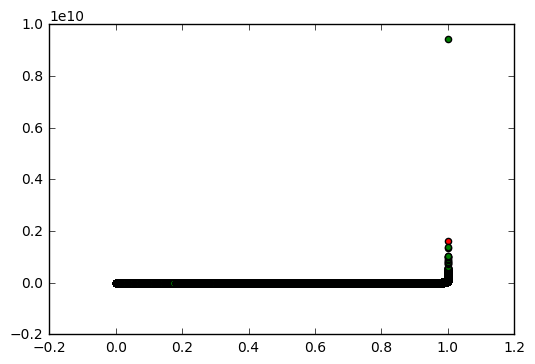

In [185]:
# plt.scatter(percentiles_salaried_2012_13, taxable_incomes_salaried_2012_13, c='b')
plt.scatter(percentiles_salaried_2013_14, taxable_incomes_salaried_2013_14, c='r')
plt.scatter(percentiles_salaried_2014_15, taxable_incomes_salaried_2014_15, c='g')
plt.show()
# 13 - 15, 15 - 17

In [571]:
g12_13 = sum(taxable_incomes_salaried_2012_13) / len(taxable_incomes_salaried_2012_13)

In [572]:
g13_14 = sum(taxable_incomes_salaried_2013_14) / len(taxable_incomes_salaried_2013_14)
(g13_14 - g12_13) / g12_13

-0.10730596387414258

In [573]:
g13_14

1653145.0764163267

In [574]:
g14_15

1752322.1551471178

In [575]:
g14_15 = sum(taxable_incomes_salaried_2014_15) / len(taxable_incomes_salaried_2014_15)
(g14_15 - g13_14) / g13_14

0.05999296743258995

In [576]:
g15_16 = sum(taxable_incomes_salaried_2015_16) / len(taxable_incomes_salaried_2015_16)
(g15_16 - g14_15) / g14_15

0.04066799861875677

In [577]:
g16_17 = sum(taxable_incomes_salaried_2016_17) / len(taxable_incomes_salaried_2016_17)
(g16_17-g15_16) / g15_16

-0.03592272168380364

In [234]:
# distribution_trace_2012_13 = go.Scattergl(
#     x = percentiles_salaried_2012_13,
#     y = taxable_incomes_salaried_2012_13,
#     mode = 'lines+markers',
#     name = '2012 - 2013'
# )

# layout = dict(title = 'Distribution of Income for Salaried Taxpayers',
#               xaxis = dict(title = 'Percentile'),
#               yaxis = dict(title = 'Earnings (PKR)'),
#               )
# data = [distribution_trace_2012_13]
# fig = dict(data=data, layout=layout)
# py.iplot(fig, filename='distribution_taxpayer_incomes')

In [ ]:
# Once I get the first year right, add the rest

See distribution over time (do all together) (then bunch years based on tax changes) . Try scatter and line. Put average growth rate under. Also how does tax grow, and unique people vs re-filers. Might need to readjust the registration number format (also CNIC vs regis num). Now thinking about inflation (real income growth vs nominal growth)

### Comparing Survey and Tax Data

We care that the tax data is *more* useful than the survey data for estimating top incomes – let's double check that that is the case here. It is well known in the literature that survey data is *god awful* at estimating top incomes. We will make lower-bound assumptions on tax data (such that we impute the lowest possible income level from the data). If these incomes are generally larger than that reported in the survey data, we know the tax data is useful.

In [ ]:
taxes_paid_2016_17
taxable_incomes_salaried_2016_17
taxable_incomes_nonsalaried_2016_17

num_filers_2016_17
num_taxpayers_2016_17
proportion_filers_2016_17
proportion_taxpayers_2016_17

# HAVE CLEANED BELOW, RETURN TO ANALYSIS

# Visualization and Conclusions

**Helper Functions**

In [1098]:
def get_final_table(table_type, start_year):  
    """
    Sorted by income.
    
    Args:
        str (table_type): accepts only 'hh' for household or 'individual' for individual.
        int (start_year): currently limited to 2004 - 2015.

    Returns:
        pd.DataFrame: dataframe corresponding to table.
    """
    t = eval("final_" + table_type + "_incomes_" + str(start_year) + "_" + (str(start_year+1)[-2:]))
    return t
    
def weighted_sum(data, weights):
    """
    Args:
        pd.Series (data)
        pd.Series (weights)

    Returns:
        float: weighted sum.
    """
    cum_sum = 0
    for i in range(0, len(weights)):
        cum_sum += data[i] * weights[i]
    return cum_sum

def top_percentiles(p, sorted_data, sorted_weights):
    """
    Args:
        int (p): 0 < p < 1.
        pd.Series (data)
        pd.Series (weights)

    Returns:
        (list, list): corresponding data, and weights.
    """
    q = (1 - p) * sum(sorted_weights)
    index = len(sorted_weights)
    cum_sum = sum(sorted_weights)
    while cum_sum > q:
        index -= 1
        cum_sum -= sorted_weights[index]
    return (list(sorted_data[index:]), list(sorted_weights[index:]))

def bottom_percentiles(p, sorted_data, sorted_weights):
    """
    Args:
        int (p): 0 <= p <=1.
        pd.Series (data)
        pd.Series (weights)

    Returns:
        (list, list): corresponding data, and weights.
    """
    q = p * sum(sorted_weights)
    index = -1
    cum_sum = 0
    while cum_sum < q:
        index += 1
        cum_sum += sorted_weights[index]
    return (list(sorted_data[:index]), list(sorted_weights[:index]))

## General Basics

**Helper Functions**

In [1060]:
# get labor force participation from world bank, female, male, total

## National Income Shares

**Helper Functions**

In [1103]:
def calculate_income_share(table_type, year, p, top=True):
    """
    Args:
        str (table_type): accepts only 'hh' for household or 'individual' for individual.
        int (year): currently limited to 2004 - 2015.
        float (percentile)
        bool (top): getting top [percentile]% or bottom [percentile]%? defaults to top.
        
    Returns:
        float: income share.
    """
    if year == 2009:
        print("No data for 2009-2010")
        return
    t = get_final_table(table_type, year)
    if top:
        p_data, p_weights = top_percentiles(p, t["income"], t["weights"])
    else:
        p_data, p_weights = bottom_percentiles(p, t["income"], t["weights"])
    partial_sum = weighted_sum(p_data, p_weights)
    total_sum = weighted_sum(t["income"], t["weights"])
    return round(partial_sum / total_sum, 2)

In [1104]:
# NEED TO THINK THROUGH HOW TO COMBINE THE TAX DATA AS IT'S HALFWAY JUNE TO JUNE. ALSO HOW TO DEAL WITH WEIGHTS.

### Top 1% Income Share

In [1105]:
# top 1 percent
years = np.arange(2004, 2016, 1)
index = np.argwhere(years==2009)
years = np.delete(years, index)

top_1_income_shares = []
for y in years:
    top_1_income_shares.append(calculate_income_share("individual", y, 0.01))

In [1106]:
top_1_trace = go.Scatter(
    x = years,
    y = top_1_income_shares,
    name = 'Top 1%'
)

layout = dict(title = 'Top 1% National Income Share in Pakistan',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'National Income Share'),
              )
data = [top_1_trace]
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')

### Top 0.1% Income Share

In [1107]:
# top 0.1 percent
years = np.arange(2004, 2016, 1)
index = np.argwhere(years==2009)
years = np.delete(years, index)

top_01_income_shares = []
for y in years:
    top_01_income_shares.append(calculate_income_share("individual", y, 0.001))

In [1108]:
top_01_trace = go.Scatter(
    x = years,
    y = top_01_income_shares,
    name = "Top 0.1%"
)

layout = dict(title = 'Top 0.1% National Income Share in Pakistan',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'National Income Share'),
              )
data = [top_01_trace]
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')

### Top 0.01% Income Share

In [1109]:
# top 0.01 percent
years = np.arange(2004, 2016, 1)
index = np.argwhere(years==2009)
years = np.delete(years, index)

top_001_income_shares = []
for y in years:
    top_001_income_shares.append(calculate_income_share("individual", y, 0.0001))

In [1110]:
top_001_trace = go.Scatter(
    x = years,
    y = top_001_income_shares,
    name = "Top 0.01%"
)

layout = dict(title = 'Top 0.01% National Income Share in Pakistan',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'National Income Share'),
              )
data = [top_001_trace]
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')

### Top 1% and Top 0.1% and Top 0.01% Income Shares

In [1111]:
layout = dict(title = 'Top 1%, Top 0.1% and Top 0.01% National Income Shares in Pakistan',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'National Income Share'),
              )
data = [top_1_trace, top_01_trace, top_001_trace]
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')

### Top 1% and Bottom 50% Income Shares

In [1112]:
# bottom 50 percent
years = np.arange(2004, 2016, 1)
index = np.argwhere(years==2009)
years = np.delete(years, index)

bottom_50_income_shares = []
for y in years:
    bottom_50_income_shares.append(calculate_income_share("individual", y, 0.5, top=False))

In [1113]:
bottom_50_trace = go.Scatter(
    x = years,
    y = bottom_50_income_shares,
    name = 'Bottom 50%'
)

layout = dict(title = 'Top 1% and Bottom 50% National Income Shares in Pakistan',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'National Income Share'),
              )
data = [top_1_trace, bottom_50_trace]
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')

### Top 10% and Middle 40% Income Shares

In [1114]:
# top 10 percent
years = np.arange(2004, 2016, 1)
index = np.argwhere(years==2009)
years = np.delete(years, index)

top_10_income_shares = []
for y in years:
    top_10_income_shares.append(calculate_income_share("individual", y, 0.1))

In [1115]:
# middle 40 percent
years = np.arange(2004, 2016, 1)
index = np.argwhere(years==2009)
years = np.delete(years, index)

middle_40_income_shares = []
for y in years:
    top20 = calculate_income_share("individual", y, 0.3)
    bottom20 = calculate_income_share("individual", y, 0.3, top=False)
    middle_40_income_shares.append(1 - (top20 + bottom20))

In [1116]:
top_10_trace = go.Scatter(
    x = years,
    y = top_10_income_shares,
    name = "top 10%"
)

middle_40_trace = go.Scatter(
    x = years,
    y = middle_40_income_shares,
    name = "middle 40%"
)

layout = dict(title = 'Top 10% and Middle 40% National Income Shares in Pakistan',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'National Income Share'),
              )
data = [top_10_trace, middle_40_trace]
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')

## Income Growth

**Helper Functions**

## Miscellaneous

**Helper Functions**

In [ ]:
income_data = [int(x) for x in heisSection9A_IncomeNoCapital["total_income_x"] if not pd.isnull(x)]
weights = [int(x) for x in heisSection9A_IncomeNoCapital["weights"]]
weighted_income_data = []
for i in range(0, len(income_data)):
    income = [income_data[i]]
    w = weights[i]
    weighted_income_data.extend(income * w)

s_data = np.array(sorted(weighted_income_data))
n = len(s_data)
percentiles = 100 * (np.arange(1, n+1) - 0.5) / n

In [ ]:
heisSectionPList_Weights = pd.read_stata('./heisSurvey/2015-16/plist.dta')
heisSectionPList_Weights["hhcode"] = heisSectionPList_Weights["hhcode"].astype('int64')
heisSectionPList_Weights = heisSectionPList_Weights[["hhcode", "weights"]].drop_duplicates()

In [ ]:
heisSection9E_IncomeWithCapital = pd.read_excel("./heisSurvey/HEISBalanceSheet.xls")
heisSection9E_IncomeWithCapital = heisSection9E_IncomeWithCapital.rename(index=str, columns={
                                "bs5ec01": "total_income_xy", 
                                "bs5ec02": "total_expenditure_ze", 
                                "bs5ec03": "ratio", 
                                "bs5ec04": "greater_than_0.85"})
heisSection9E_IncomeWithCapital = heisSection9E_IncomeWithCapital.join(heisSectionPList_Weights.set_index('hhcode'), on='hhcode')
heisSection9E_IncomeWithCapital[0:5]

In [107]:
heisSection9A_IncomeNoCapital = pd.read_excel("./heisSurvey/HEISBalanceSheet_NoCapital.xls")
heisSection9A_IncomeNoCapital = heisSection9A_IncomeNoCapital.rename(index=str, columns={
                                "bs3c01": "total_income_x", 
                                "bs3c02": "total_expenditure_z", 
                                "bs3c03": "ratio", 
                                "bs3c04": "greater_than_0.85"})
heisSection9A_IncomeNoCapital = heisSection9A_IncomeNoCapital.join(heisSectionPList_Weights.set_index('hhcode'), on='hhcode')
heisSection9A_IncomeNoCapital[0:5]

FileNotFoundError: [Errno 2] No such file or directory: './heisSurvey/HEISBalanceSheet_NoCapital.xls'

In [109]:
x = pd.read_stata('./heisSurvey/2015-16/sec_9a.dta')
x["hhcode"] = x["hhcode"].astype(int)
x

,hhcode,province,region,psu,sec,idc,bs1qc1,bs1qc2,bs1qc3,bs1qc4,bs1qc5,bs1qc6,bs1qc7,bs1qc8
0,1102010101,kp,urban,11020101,09A,1,35000.0,12.0,420000.0,NaN,NaN,NaN,NaN,420000.0
1,1102010101,kp,urban,11020101,09A,2,5000.0,12.0,60000.0,NaN,NaN,NaN,NaN,60000.0
2,1102010101,kp,urban,11020101,09A,99,NaN,NaN,480000.0,NaN,NaN,NaN,NaN,480000.0
3,1102010102,kp,urban,11020101,09A,1,15500.0,12.0,186000.0,NaN,NaN,NaN,NaN,186000.0
4,1102010102,kp,urban,11020101,09A,2,NaN,NaN,NaN,NaN,NaN,NaN,108000.0,108000.0
5,1102010102,kp,urban,11020101,09A,99,NaN,NaN,186000.0,NaN,NaN,NaN,108000.0,294000.0
6,1102010103,kp,urban,11020101,09A,1,NaN,NaN,66880.0,NaN,NaN,NaN,113640.0,180520.0
7,1102010103,kp,urban,11020101,09A,2,10000.0,12.0,120000.0,NaN,NaN,NaN,NaN,120000.0
8,1102010103,kp,urban,11020101,09A,99,NaN,NaN,186880.0,NaN,NaN,NaN,113640.0,300520.0
9,1102010104,kp,urban,11020101,09A,51,NaN,NaN,12900.0,NaN,NaN,NaN,NaN,12900.0


In [106]:
heisSection1B_IncomeNoCapital = pd.read_stata("./heisSurvey/2015-16/other_sections/sec_1b.dta", convert_categoricals=False)
heisSection1B_IncomeNoCapital = heisSection1B_IncomeNoCapital.rename(index=str, columns={
                                "s1bq01": "did_work", 
                                "s1bq02": "days_worked", 
                                "s1bq03": "did_have_job", 
                                "s1bq04": "nature_of_occupation",
                                "s1bq05": "nature_of_enterprise",
                                "s1bq06": "employment_status",
                                "s1bq07": "monthly_or_annual",
                                "s1bq08": "monthly_earnings",
                                "s1bq09": "months_worked",
                                "s1bq10": "annual_earnings",
                                "s1bq11": "other_work",
                                "s1bq12": "nature_of_occupation_other",
                                "s1bq13": "nature_of_employer",
                                "s1bq14": "employment_status",
                                "s1bq15": "annual_earnings_other",
                                "s1bq16": "other_other_work",
                                "s1bq17": "annual_earnings_other_other",
                                "s1bq18": "sell_wages",
                                "s1bq19": "money_received_by_selling_wages",
                                "s1bq20": "was_pension_received",
                                "s1bq21": "pension_amount",
                                "s1bq22": "used_for_hh",
                                "s1bq23": "operation_in_agriculture",
                                "s1bq24": "did_own_livestock",
                                "s1bq25": "proprietor_or_partner_of_business",
                                "s1bq26": "how_many_shops_associated"})
# heisSection1B_IncomeNoCapital = heisSection1B_IncomeNoCapital.join(heisSectionPList_Weights.set_index('hhcode'), on='hhcode')
heisSection1B_IncomeNoCapital["hhcode"] = heisSection1B_IncomeNoCapital["hhcode"].astype(int)
heisSection1B_IncomeNoCapital

,hhcode,province,region,psu,sec,idc,did_work,days_worked,did_have_job,nature_of_occupation,nature_of_enterprise,employment_status,monthly_or_annual,monthly_earnings,months_worked,annual_earnings,other_work,nature_of_occupation_other,nature_of_employer,employment_status,annual_earnings_other,other_other_work,annual_earnings_other_other,sell_wages,money_received_by_selling_wages,was_pension_received,pension_amount,used_for_hh,operation_in_agriculture,did_own_livestock,proprietor_or_partner_of_business,how_many_shops_associated
0,1102010101,1,2,11020101,01B,1,1,30.0,NaN,5413.0,8423.0,4.0,1.0,35000.0,12.0,NaN,2.0,NaN,NaN,NaN,NaN,2,NaN,2,NaN,2,NaN,1,2.0,4.0,2.0,NaN
1,1102010101,1,2,11020101,01B,2,1,26.0,NaN,7231.0,4100.0,4.0,1.0,5000.0,12.0,NaN,2.0,NaN,NaN,NaN,NaN,2,NaN,2,NaN,2,NaN,1,NaN,NaN,NaN,NaN
2,1102010101,1,2,11020101,01B,3,2,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,2,NaN,3,NaN,NaN,NaN,NaN
3,1102010101,1,2,11020101,01B,51,2,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,2,NaN,3,2.0,4.0,2.0,NaN
4,1102010101,1,2,11020101,01B,54,2,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,2,NaN,3,NaN,NaN,NaN,NaN
5,1102010101,1,2,11020101,01B,55,2,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,2,NaN,3,NaN,NaN,NaN,NaN
6,1102010102,1,2,11020101,01B,1,1,30.0,NaN,5419.0,8510.0,4.0,1.0,15500.0,12.0,NaN,2.0,NaN,NaN,NaN,NaN,2,NaN,2,NaN,2,NaN,1,2.0,4.0,2.0,NaN
7,1102010102,1,2,11020101,01B,2,2,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,1,108000.0,1,NaN,NaN,NaN,NaN
8,1102010102,1,2,11020101,01B,51,2,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,2,NaN,3,2.0,4.0,2.0,NaN
9,1102010103,1,2,11020101,01B,1,1,20.0,NaN,6330.0,150.0,6.0,2.0,NaN,NaN,66880.0,2.0,NaN,NaN,NaN,NaN,2,NaN,2,NaN,1,113640.0,1,1.0,NaN,2.0,NaN


### Miscellaneous Datasets

In [ ]:
pak_world_bank_indicators = pd.read_excel("./miscData/world_bank_bottom20_income_share_and_population.xlsx")

In [ ]:
lowest_20_income = pak_world_bank_indicators[pak_world_bank_indicators["Series Code"] == "SI.DST.FRST.20"]
lowest_20_income

In [ ]:
population = pak_world_bank_indicators[pak_world_bank_indicators["Series Code"] == "SP.POP.TOTL"]
population

In [ ]:
heisSection1B_IncomeNoCapital.shape 

**Getting a feel for the data**

In [ ]:
# heisSection1B_IncomeNoCapital[pd.notnull(heisSection1B_IncomeNoCapital["money_received_by_selling_wages"])]
heisSection1B_IncomeNoCapital[heisSection1B_IncomeNoCapital["hhcode"] == 1131010201]

In [ ]:
heisSection9A_IncomeNoCapital.shape

In [ ]:
heisSection9A_IncomeNoCapital[heisSection9A_IncomeNoCapital["hhcode"] == 1131010201]

In [ ]:
heisSection9A_IncomeNoCapital

In [ ]:
heisSection9E_IncomeWithCapital.shape

In [ ]:
heisSection9E_IncomeWithCapital[0:10]

**Making sense of the difference in number of entries** (also looking at household survey linked here: http://www.pbs.gov.pk/sites/default/files//pslm/publications/pslm_microdata_2015_16_HIES/HIICS%20Male%20Questionnaire%20%282015-16%29.pdf)

Here is the introduction that came with the survey and explains some of the terms / sampling methods: http://www.pbs.gov.pk/sites/default/files//pslm/publications/pslm_microdata_2015_16_HIES/Introduction.pdf

In [ ]:
# Let's see different entries on the same table
hhcode = 2513311004

# 1 1102020203
# 2 1302032607
# 3 1423211302
# 4 1423212903
# 5 1423215304
# 6 2513311004
# 7 2602010208
# 8 2723241109
# 9 2831010206
# 10 3111030111
# 11 3302011512
# 12 3421040201
# 13 3513211601
# 14 3523220412
# 15 3543221707
# 16 3553221313
# 17 4401020701

In [ ]:
heisSection1B_IncomeNoCapital[heisSection1B_IncomeNoCapital["hhcode"] == hhcode]
# heisSection1B_IncomeNoCapital.psu

In [ ]:
heisSection9A_IncomeNoCapital[heisSection9A_IncomeNoCapital["hhcode"] == hhcode]

In [ ]:
heisSection9E_IncomeWithCapital[heisSection9E_IncomeWithCapital["hhcode"] == hhcode]

In [ ]:
# Test assumption: how many unique households does the first dataset have?
len(set(heisSection1B_IncomeNoCapital["hhcode"]))
# YES!

In [ ]:
households_with_toolow_income = list(heisSection9A_IncomeNoCapital[heisSection9A_IncomeNoCapital["greater_than_0.85"] == "no"]["hhcode"])
households_with_capital_income = list(heisSection9E_IncomeWithCapital["hhcode"])

In [ ]:
print(len(households_with_toolow_income))
print(len(households_with_capital_income))

Households to explore in the last two datasets. It looks like everything that was *heisSection9A_IncomeNoCapital* and didn't have a greater_than_0.85 was re-evaluated in the  *heisSection9E_IncomeWithCapital* section. Let's see if there are any 'no's in the first that weren't evaluated and any households in the second that were evaluated regardless.

In [ ]:
i = 1
for h in households_with_toolow_income:
    if h not in households_with_capital_income:
        print(i, h)
        i += 1
print("\n")
j = 1
for h in households_with_capital_income:
    if h not in households_with_toolow_income:
        print(j, h)
        j += 1

Using the above evaluator for each household to see the values - it looks like 2721040211 has improper data entry for section 9E (therefore I am removing it). The others were simply not followed up on, but the sample size is also so insiginificant that I'm keeping them in here.

**Dataset Descriptions**

In [ ]:
heisSection1B_IncomeNoCapital.shape 
# Income by Individual (for every household, most granular)

In [ ]:
heisSection9A_IncomeNoCapital.shape 
# Income By Household

In [ ]:
heisSection9E_IncomeWithCapital.shape 
# Households above with suspect income / expenditure ratios (adds in capital component for some households).

# When combining the datasets, let's double check to see that these households are mainly in the 
# top 20% of income once adding in their capital earnings. Let's also see where they lie before adding in 
# capital / this dataset's values. TODO need to ask if this is typical and how exactly to interpret this data
# as some respondants seem to be able refuse to do this part (like 2513311004 who seems to be a top 20% earner)

One thing to be cognizant about is that section 1B is filled out by male and female, but section 9 is filled by males only. There are incentives both ways that I need to take into account - it means that there could either be a bias upward to make the family stand out as richer (without the other members of the family in the room to make the person feel accountable) or poorer.

TODO ask professors about potential misaligned incentives due to survey design
TODO pensions are government transfers, "Government  benefits,  reported  in  the  survey,  are excluded from the analysis for consistency with tax tabulations;our focus is pre-tax income."

### Cleaning, Combining and Ordering Datasets

In [ ]:
income_data = [int(x) for x in heisSection9A_IncomeNoCapital["total_income_x"] if not pd.isnull(x)]
weights = [int(x) for x in heisSection9A_IncomeNoCapital["weights"]]
weighted_income_data = []
for i in range(0, len(income_data)):
    income = [income_data[i]]
    w = weights[i]
    weighted_income_data.extend(income * w)

s_data = np.array(sorted(weighted_income_data))
n = len(s_data)
percentiles = 100 * (np.arange(1, n+1) - 0.5) / n

In [ ]:
sum(s_data) / 26581120581632

In [ ]:
[int(x) for x in heisSection9E_IncomeWithCapital["total_income_xy"] if not pd.isnull(x)]

In [ ]:
%store -r export_data
%store -r t_percentiles

In [ ]:
# let's compare the data above the 77.5th percentile
other_s_data = s_data[n-5800000:]
n = len(other_s_data)
other_percentiles = 100 * (np.arange(1, n+1) - 0.5) / n

In [ ]:
# Plots of just the data above 400,000 PRK earnings or the top 23% of earners in Pakistan -- EVEN THE TAXPAYER DATA IS BETTER
plt.scatter(other_percentiles[:-10000], other_s_data[:-10000], c='b')
plt.scatter(t_percentiles[:-10000], export_data[:-10000], c='r')
plt.show()

In [ ]:
# Plots of just the data of the top 1% of 20% -- EVEN THE TAXPAYER DATA IS BETTER
plt.scatter(other_percentiles[-10000:], other_s_data[-10000:], c='b')
plt.scatter(t_percentiles[-10000:], export_data[-10000:], c='r')
plt.show()

In [ ]:
plt.scatter(percentiles, s_data)
plt.show()

In [ ]:
s_data[n-5800000]
percentiles[n-5800000]

In [ ]:
plt.scatter(percentiles[n - 5800000:n-10000], s_data[n - 5800000:n-10000])
plt.show()

In [ ]:
# how to combine tax data in individual level... what if we graph it and see the difference...

In [ ]:
s_data = np.array(sorted([int(x) for x in heisSection9E_IncomeWithCapital["total_expenditure_ze"] if not pd.isnull(x)]))
n = len(s_data)
percentiles = 100 * (np.arange(1, n+1) - 0.5) / n

In [ ]:
s_data = np.array(sorted([float(x) for x in heisSection9A_IncomeNoCapital["ratio"] if not pd.isnull(x)]))
n = len(s_data)
percentiles = 100 * (np.arange(1, n+1) - 0.5) / n

In [ ]:
# income / expenditure
plt.scatter(percentiles[n - 7000:n - 2000], s_data[n - 7000:n - 2000])
plt.show()

In [ ]:
# taxes start at 1,200,000, used to start at 400,000 at time of survey
s_data = np.array(sorted([int(x) for x in heisSection9A_IncomeNoCapital["total_income_x"] if not pd.isnull(x)]))
n = len(s_data)
percentiles = 100 * (np.arange(1, n+1) - 0.5) / n
obs_num = 17620
print(s_data[obs_num])
print(percentiles[obs_num])

**Expanding the Survey By Multiplying by Weights**

In [ ]:
# let's combine section 9A and 9E in the surveys

In [ ]:
heisSection9E_IncomeWithCapital

# Exploratory Data Analysis (Visualization)